<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module G: Section 21.1, 21.2, 21.3

Danika Young

# Numerical Integration Problem Statement

Integration is a fundamental concept in calculus used to compute the **area under a curve**, accumulated change, or total values in various real-world applications.

The definite integral of a function $ f(x) $ over the interval \[a, b]$is given by:

$
I = \int_a^b f(x) dx
$

However, many real-world functions **cannot be integrated analytically** due to their complexity. In such cases, **numerical integration** techniques provide an approximation.

## **Why Use Numerical Integration?**
- Some functions lack a closed-form integral (e.g., complex polynomials, exponential functions, or real-world data-based functions).
- Often used in **physics, engineering, economics, and machine learning**.
- Useful for approximating areas, volumes, and probabilities.

## **Types of Numerical Integration Methods**
1. **Riemann’s Integral** (Left, Right, Midpoint Sums)
2. **Trapezoidal Rule** (Linear approximation using trapezoids)
3. **Simpson’s Rule** (Quadratic approximation, not covered here)
4. **Monte Carlo Integration** (Random sampling-based method, useful in higher dimensions)


Numerical Approximation: 1.9979983534190813
Exact Integral: 2.0
Error: 0.0020016465809187256


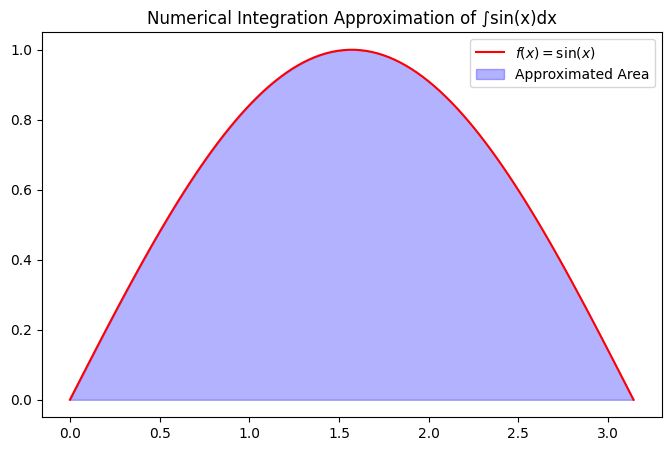

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return np.sin(x)

# Define numerical integration function using basic summation
def numerical_integration_basic(a, b, n):
    x = np.linspace(a, b, n)  # Generate n points between a and b
    dx = (b - a) / n  # Width of each small interval
    integral = np.sum(f(x) * dx)  # Sum up small areas
    return integral

# Integration limits
a, b = 0, np.pi
n = 1000  # More intervals give better accuracy

# Compute numerical approximation
approx_integral = numerical_integration_basic(a, b, n)

# Exact value of the integral for comparison
exact_integral = -np.cos(b) + np.cos(a)

# Print results
print(f"Numerical Approximation: {approx_integral}")
print(f"Exact Integral: {exact_integral}")
print(f"Error: {abs(exact_integral - approx_integral)}")

# Visualization
x = np.linspace(a, b, 100)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'r', label=r'$f(x) = \sin(x)$')
plt.fill_between(x, y, alpha=0.3, color='blue', label="Approximated Area")
plt.title("Numerical Integration Approximation of ∫sin(x)dx")
plt.legend()
plt.show()


# Riemann’s Integral

The **Riemann Integral** is a numerical method to approximate the integral of a function by summing up small rectangles under a curve.

We partition the interval $[a, b]$ into `n` subintervals and compute:

$
I \approx \sum_{i=0}^{n-1} f(x_i) \Delta x
$

where $\Delta x$ is the width of each rectangle.

## **Types of Riemann Sums**
- **Left Riemann Sum**: Uses the left endpoints of subintervals.
- **Right Riemann Sum**: Uses the right endpoints of subintervals.
- **Midpoint Riemann Sum**: Uses the midpoint of each subinterval.

### **Left Riemann Sum**

- Uses the **left endpoint** of each subinterval as the function evaluation point.
- The formula is:

$
S_{\text{left}} = \sum_{i=0}^{n-1} f(x_i) \Delta x
$

where:

$
x_i = a + i \Delta x
$

#### **Advantages**
- Simple to compute.
- Good for **increasing functions** (overestimates) and **decreasing functions** (underestimates).

#### **Disadvantages**
- Less accurate because it **ignores the right side of each interval**.
- Large errors for rapidly changing functions.


### **Right Riemann Sum**

- Uses the **right endpoint** of each subinterval.
- The formula is:

$
S_{\text{right}} = \sum_{i=1}^{n} f(x_i) \Delta x
$

where:

$
x_i = a + i \Delta x
$

#### **Advantages**
- More accurate than the **Left Riemann Sum** for increasing functions.

#### **Disadvantages**
- Still less accurate than midpoint and trapezoidal rule.
- Tends to **overestimate increasing functions** and **underestimate decreasing functions**.


### **Midpoint Riemann Sum**

- Uses the **midpoint** of each subinterval:

$
S_{\text{mid}} = \sum_{i=0}^{n-1} f\left( \frac{x_i + x_{i+1}}{2} \right) \Delta x
$

where:

$
x_i = a + \left(i + \frac{1}{2} \right) \Delta x
$

#### **Advantages**
- More **accurate** than both left and right sums.
- Provides a **better approximation** to the exact integral.
- The error decreases faster than the left/right Riemann sums.

#### **Disadvantages**
- Slightly more computation than left and right sums.

In [2]:
def riemann_sum(a, b, n, method='left'):
    x = np.linspace(a, b, n+1)
    dx = (b - a) / n

    if method == 'left':
        x_values = x[:-1]  # Left endpoints
    elif method == 'right':
        x_values = x[1:]  # Right endpoints
    elif method == 'midpoint':
        x_values = (x[:-1] + x[1:]) / 2  # Midpoints
    else:
        raise ValueError("Method must be 'left', 'right', or 'midpoint'")

    sum_approx = np.sum(f(x_values) * dx)
    return sum_approx

# Compute Riemann sums for sin(x) from 0 to pi
left_sum = riemann_sum(a, b, n, method='left')
right_sum = riemann_sum(a, b, n, method='right')
midpoint_sum = riemann_sum(a, b, n, method='midpoint')

# Print results
print(f"Left Riemann Sum: {left_sum}")
print(f"Right Riemann Sum: {right_sum}")
print(f"Midpoint Riemann Sum: {midpoint_sum}")


Left Riemann Sum: 1.9999983550656626
Right Riemann Sum: 1.9999983550656628
Midpoint Riemann Sum: 2.00000082246727


Left Riemann Sum: 2.2800000000000007
Right Riemann Sum: 3.08
Midpoint Riemann Sum: 2.6600000000000006


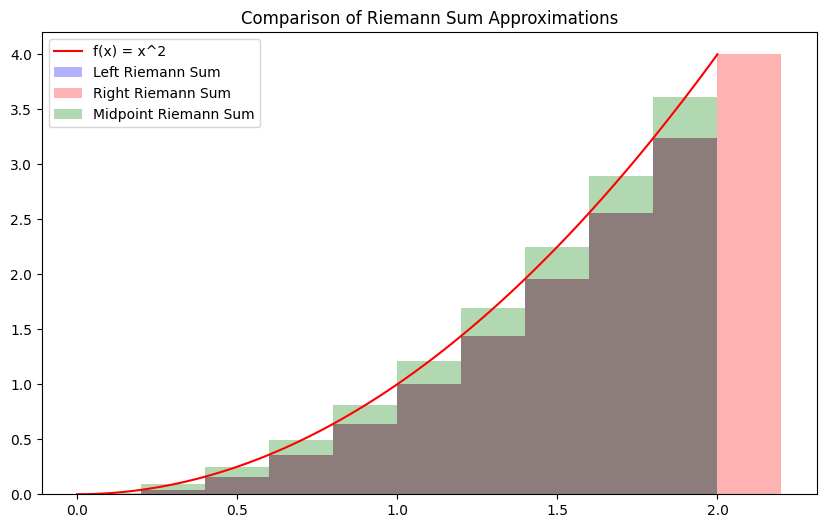

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return x**2  # Example function: f(x) = x^2

# Riemann Sum Function
def riemann_sum(a, b, n, method='left'):
    x = np.linspace(a, b, n+1)  # Partition points
    dx = (b - a) / n  # Subinterval width

    if method == 'left':
        x_values = x[:-1]  # Left endpoints
    elif method == 'right':
        x_values = x[1:]  # Right endpoints
    elif method == 'midpoint':
        x_values = (x[:-1] + x[1:]) / 2  # Midpoints
    else:
        raise ValueError("Method must be 'left', 'right', or 'midpoint'")

    sum_approx = np.sum(f(x_values) * dx)
    return sum_approx

# Define integration limits
a, b = 0, 2
n = 10  # Number of intervals

# Compute Riemann sums
left_sum = riemann_sum(a, b, n, method='left')
right_sum = riemann_sum(a, b, n, method='right')
midpoint_sum = riemann_sum(a, b, n, method='midpoint')

# Print results
print(f"Left Riemann Sum: {left_sum}")
print(f"Right Riemann Sum: {right_sum}")
print(f"Midpoint Riemann Sum: {midpoint_sum}")

# Visualization of different Riemann sums
x = np.linspace(a, b, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r', label='f(x) = x^2')

# Left Riemann Sum Visualization
x_left = np.linspace(a, b - (b-a)/n, n)
y_left = f(x_left)
plt.bar(x_left, y_left, width=(b-a)/n, alpha=0.3, align='edge', color='blue', label="Left Riemann Sum")

# Right Riemann Sum Visualization
x_right = np.linspace(a + (b-a)/n, b, n)
y_right = f(x_right)
plt.bar(x_right, y_right, width=(b-a)/n, alpha=0.3, align='edge', color='red', label="Right Riemann Sum")

# Midpoint Riemann Sum Visualization
x_mid = np.linspace(a + (b-a)/(2*n), b - (b-a)/(2*n), n)
y_mid = f(x_mid)
plt.bar(x_mid, y_mid, width=(b-a)/n, alpha=0.3, align='center', color='green', label="Midpoint Riemann Sum")

plt.legend()
plt.title("Comparison of Riemann Sum Approximations")
plt.show()


# Trapezoid Rule

The **Trapezoidal Rule** is an improved numerical integration technique that replaces rectangles with **trapezoids**, reducing error.

Instead of assuming a function is constant over each interval, it assumes a **linear approximation**. The formula is:

$
I \approx \frac{h}{2} \left( f(a) + 2 \sum f(x_i) + f(b) \right)
$

where $ h = \frac{b-a}{n} $ is the step size.

## **Advantages of the Trapezoidal Rule**
* More accurate than **Riemann sums**  
*   Works well for **smooth** functions  
*   Easy to implement





Trapezoidal Rule Approximation: 1.9999983550656624


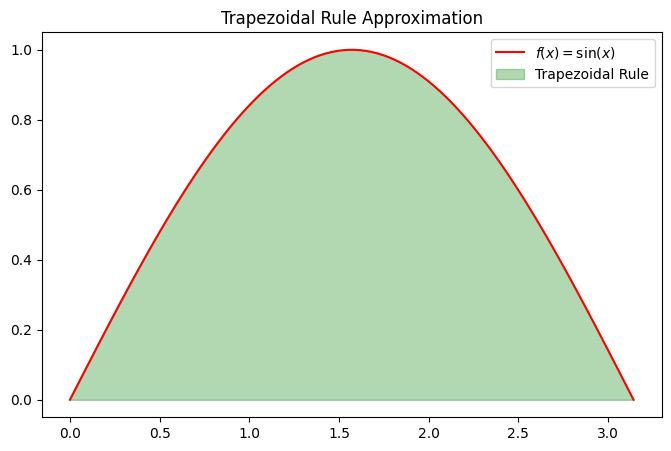

In [3]:
def trapezoid_rule(a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    dx = (b - a) / n
    integral = (dx / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

# Compute Trapezoidal Approximation
trapezoid_integral = trapezoid_rule(a, b, n)
print(f"Trapezoidal Rule Approximation: {trapezoid_integral}")

# Visualization
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'r', label=r'$f(x) = \sin(x)$')

# Trapezoids
x_trap = np.linspace(a, b, n+1)
y_trap = f(x_trap)
plt.fill_between(x_trap, y_trap, alpha=0.3, color='green', label="Trapezoidal Rule")

plt.legend()
plt.title("Trapezoidal Rule Approximation")
plt.show()
